In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy as sc
from scipy.stats import spearmanr
from scvi.data import cortex, smfish
from scvi.external import GIMVI_GCN
import scvi
import pandas as pd
from sklearn.model_selection import train_test_split

import random 
random.seed(2023)

[rank: 0] Global seed set to 0


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
scvi

<module 'scvi' from '/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/scvi/__init__.py'>

In [4]:
from scipy import stats
import scipy.stats as st
import scipy

In [7]:
adata = sc.read("gimvigat_mousead_8m.h5ad")

In [8]:
adata

AnnData object with n_obs × n_vars = 8506 × 18838
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'names', 'ind_x', 'scClassify', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    obsm: 'imputed', 'imputed_raw'

In [9]:
adata_sp_raw = sc.read("/gpfs/gibbs/pi/zhao/tl688/spatial_ad/adata_8_control_rep1.h5ad")

In [67]:
adata_sp_raw = adata_sp_raw[:,1:]

In [68]:
adata_sp_raw 

View of AnnData object with n_obs × n_vars = 8506 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type'
    obsm: 'X_spatial'

In [12]:
adata.obsm['X_spatial'] = adata_sp_raw.obsm['X_spatial'].copy()

In [69]:
adata.var_names

False

In [21]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [22]:
adata = adata[:, adata.var['highly_variable']]

In [23]:
adata

View of AnnData object with n_obs × n_vars = 8506 × 2000
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'names', 'ind_x', 'scClassify', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'imputed', 'imputed_raw', 'X_spatial'

In [24]:
sc.tl.rank_genes_groups(adata, groupby='scClassify')

/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [30]:
adata.uns['rank_genes_groups']['names']['Micro']

array(['Ly86', 'C1qa', 'Ctss', ..., 'Cpeb1', 'Slit1', 'Ldb2'],
      dtype=object)

In [52]:
for i in adata.uns['rank_genes_groups']['names']['Micro']:
    print(i)

Ly86
C1qa
Ctss
Laptm5
Apbb1ip
Itgb5
Adap2
Fyb
Selplg
Dapp1
Dock4
Cd37
Olfml3
A830008E24Rik
Vsir
Lyn
Arhgap45
Fcrls
Gpr34
Ltc4s
P2ry6
Rhoh
Cd84
Pnpla7
Cyth4
Fcer1g
Dock8
Mafb
Pag1
P2ry12
Ppp1r1a
Sparc
Unc93b1
C1qb
Gns
Phyhd1
Hpgds
Cd300c2
Pld4
Lpcat2
Csf1r
Epb41l2
Nrip1
Bmp2k
F630028O10Rik
Lair1
Ifngr1
Ctsd
Klf3
Ophn1
Lgmn
Tgfbr1
Cx3cr1
Slco2b1
Fgd2
Dock2
Hexb
Il10ra
Ncf1
Kctd12
C1qc
Zfp69
Man2b1
Trem2
Fchsd2
Ccl6
Siglech
Zfp36l2
St3gal6
Ptprc
Numb
Fli1
Ecscr
Stab1
Fmnl3
Mertk
Entpd1
Ikzf1
Vav1
Elmo1
Srgap2
Rcsd1
Abca9
Tgfbr2
Frmd4a
Irak2
Plxdc2
Ssh2
Mef2a
Arhgef40
Ivns1abp
Lrrk1
Ankrd44
Trim12a
Rrbp1
Runx1
Mtus1
Inpp5d
Klhl1
Adrb2
Cst3
Rab5c
Cd209a
Abca1
Lrch1
Fam105a
Gdi2
Cd33
Mylip
Rbm47
Slc40a1
Pde3b
Rapgef5
Mgst1
Tmem176b
Sema7a
Pid1
Gch1
Tm6sf1
Anxa3
Mfsd2a
Chd9
Txnip
Zfhx3
Rasal3
Crlf3
Gpsm3
Cyba
Whrn
Fzd4
Mmp28
Ets1
Mis18bp1
Bsg
Tax1bp3
Mbnl1
Ggta1
Csmd3
Maf
Cfh
Vwa1
Arl4c
Nfe2l2
Pou2f2
Kcnj2
Itga6
Stard9
Ctsh
Zfp36l1
Arhgap5
Tmcc3
Stard8
Gbp7
Tpt1
Rhob
Rhobtb1
Rreb1
Apc2
Pabpc1

In [ ]:
'''
Ly86#
C1qa#
Ctss#
Laptm5
Apbb1ip
Itgb5#
Adap2
Fyb
Selplg#
Dapp1
'''

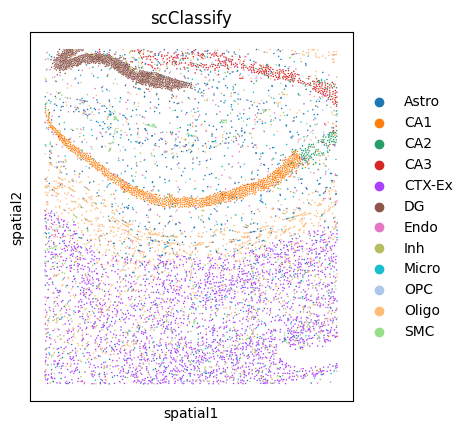

In [37]:
sc.pl.spatial(adata, color='scClassify', spot_size=100)

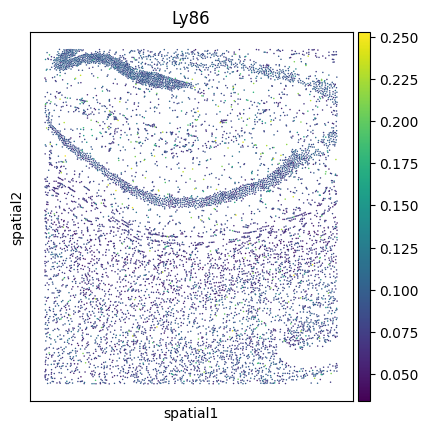

In [34]:
sc.pl.spatial(adata, color='Ly86', spot_size=100)

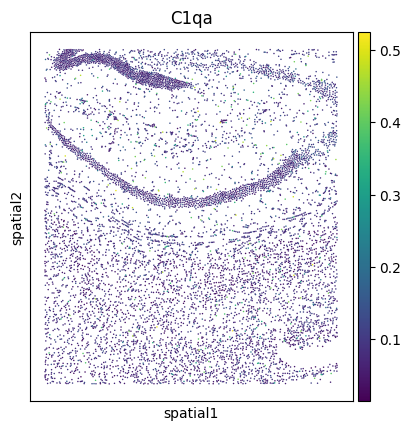

In [35]:
sc.pl.spatial(adata, color='C1qa', spot_size=100)

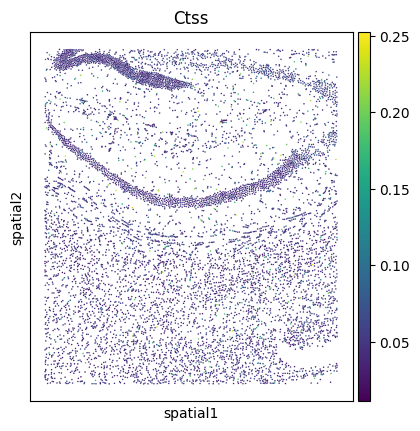

In [36]:
sc.pl.spatial(adata, color='Ctss', spot_size=100)

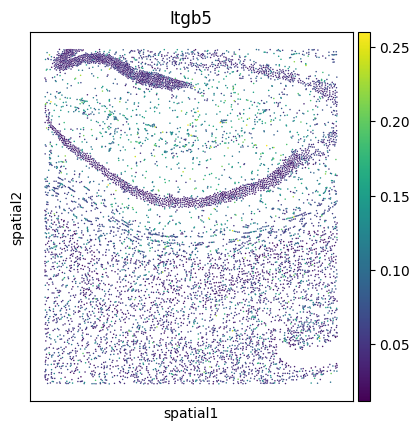

In [81]:

sc.pl.spatial(adata, color='Itgb5', spot_size=100)

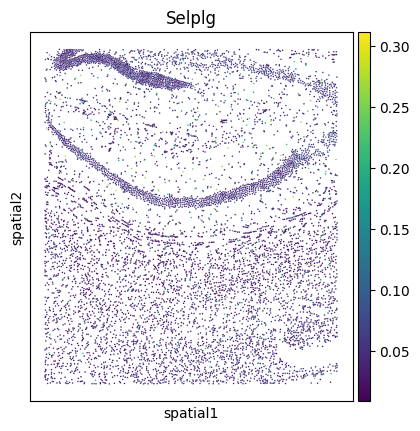

In [82]:
sc.pl.spatial(adata, color='Selplg', spot_size=100)

In [5]:
adata_ad = sc.read("/gpfs/gibbs/pi/zhao/tl688/spatial_ad/adata_8_disease_rep1.h5ad")

In [7]:
adata_ad.obs['top_level_cell_type']

55778    CTX-Ex
55779    CTX-Ex
55780       SMC
55781       Inh
55782    CTX-Ex
          ...  
63959     Oligo
63960    CTX-Ex
63961    CTX-Ex
63962       Inh
63963    CTX-Ex
Name: top_level_cell_type, Length: 8186, dtype: category
Categories (13, object): ['Astro', 'CA1', 'CA2', 'CA3', ..., 'Micro', 'OPC', 'Oligo', 'SMC']

In [72]:
adata_ad = adata_ad[:,1:]

In [73]:
sc.pp.normalize_per_cell(adata_ad)
sc.pp.log1p(adata_ad)
sc.pp.highly_variable_genes(adata_ad, n_top_genes=2000)

/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


In [74]:
adata_ad = adata_ad[:, adata_ad.var['highly_variable']]

In [75]:
adata_ad

View of AnnData object with n_obs × n_vars = 8186 × 2000
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    obsm: 'X_spatial'

In [76]:
sc.tl.rank_genes_groups(adata_ad, groupby='top_level_cell_type')

/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:580: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


In [77]:
for i in adata_ad.uns['rank_genes_groups']['names']['Micro']:
    print(i)

C1qa
Hexb
Cst3
Ctss
Itgb5
Fcrls
Ly86
Sparc
Kctd12
Selplg
Cd9
Ctsb
Cst7
Trem2
Ctsd
P2ry12
Cd68
Cd63
Ly6e
Tmsb4x
Grn
C1qb
Myo9a
Ccl6
Lyz2
Ftl1
Clec7a
Gpr34
Csf1r
Lpcat2
Olfml3
Lyn
Tgfbr2
Apoe
Plekho1
Dnm2
Ctsl
Fcgr1
Tmem176b
Serpine2
Serpinb1b
Siglech
Marcks
Cx3cr1
Kcnj2
Blnk
Ctps
Mertk
Numb
Tns3
Arrb2
Rnase4
Rgs2
Csf3r
Baiap2l2
Irf8
Itm2b
Sema4d
Lpar6
Lamp1
Etv5
Tgfbr1
Notch2
Hif1a
Stab1
Lcp1
Fga
Ecscr
Cd83
Pabpc1
Maf
Tbxas1
Adrb2
Ctnnd1
Gfap
Arhgef7
Slc2a5
Cd86
Ccl3
Samsn1
Axl
Cd33
Zc3h7a
Gdi2
Ifi27l2a
Tec
Tpt1
Nrp1
Nfatc2
Psmb8
F2rl1
Trpv1
Ccr5
Stat3
Fgb
Rel
Sdcbp
Arhgdia
Apln
Runx1
Dock8
Cyfip1
Klf6
Sall1
Nek6
Tapbp
Klf3
Bcl11b
Ebf3
Fam20c
Cd74
Eef2k
Maml3
Whrn
Flot1
H2-k1
Ppm1h
Itih2
Itga5
Rimbp2
Emp3
Espn
Sele
Ifih1
Mapk14
Anxa3
Car8
Fabp5
St6gal1
Golm1
Colq
Bin1
Itgb3
Tpd52l1
Itgax
Ppp1r9b
Pde3a
Mctp2
Corin
Cenpe
Il1b
Ophn1
Smad1
Bmpr1b
Bspry
Ptpro
Ccl4
Klf5
Ccr6
Csrnp1
Anxa5
Cxcr4
Hoxa7
Tmem141
Hfe
Thrsp
Tyrobp
Rab26
Cables1
Arhgap22
Mia
Ms4a6d
Col25a1
Calca
Gabra6
Ajap1
Errfi1
C

In [ ]:
#ad raw cond
'''
C1qa#
Hexb
Cst3
Ctss#
Itgb5#
Fcrls
Ly86#
Sparc
Kctd12
Selplg#
'''
#ad imp case
'''
Ly86#
C1qa#
Ctss#
Laptm5
Apbb1ip
Itgb5#
Adap2
Fyb
Selplg#
Dapp1
'''

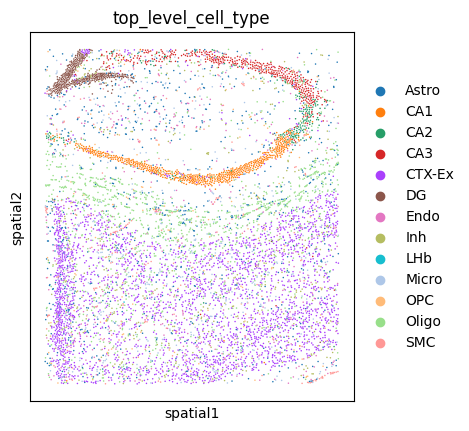

In [57]:
sc.pl.spatial(adata_ad, color='top_level_cell_type', spot_size=100)

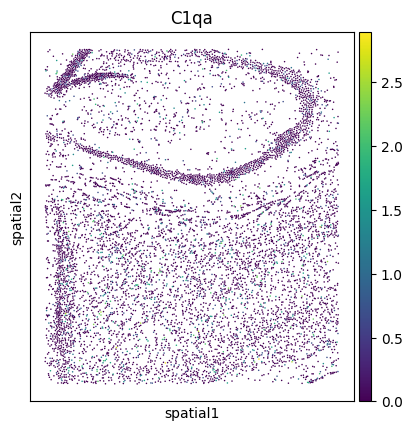

In [49]:
sc.pl.spatial(adata_ad, color='C1qa', spot_size=100)

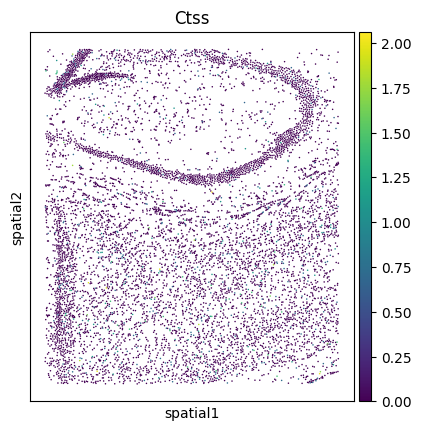

In [56]:
sc.pl.spatial(adata_ad, color='Ctss', spot_size=100)

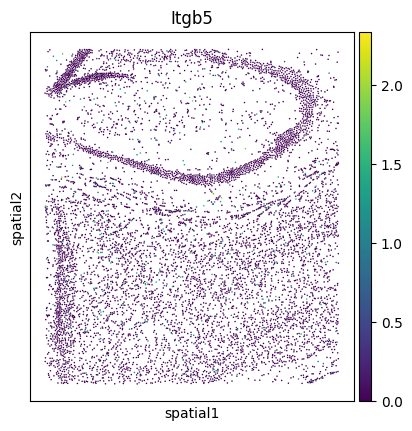

In [78]:
sc.pl.spatial(adata_ad, color='Itgb5', spot_size=100)

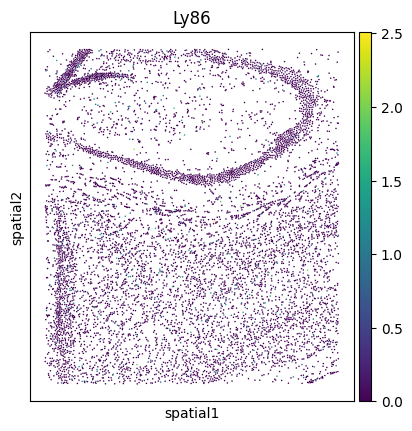

In [79]:

sc.pl.spatial(adata_ad, color='Ly86', spot_size=100)

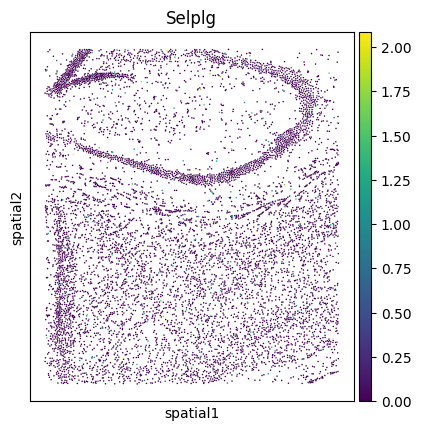

In [80]:
sc.pl.spatial(adata_ad, color='Selplg', spot_size=100)

# Plot difference matrix

In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import scanpy
import scanpy as sc
from scipy.stats import spearmanr
from scvi.data import cortex, smfish
from scvi.external import GIMVI_GCN
import scvi
import pandas as pd
from sklearn.model_selection import train_test_split

import random 
random.seed(2023)

[rank: 0] Global seed set to 0


In [2]:
scvi

<module 'scvi' from '/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/scvi/__init__.py'>

In [3]:
from scipy import stats
import scipy.stats as st
import scipy

In [4]:
adata = sc.read("gimvigat_mousead_8m.h5ad")

In [5]:
adata

AnnData object with n_obs × n_vars = 8506 × 18838
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type', 'names', 'ind_x', 'scClassify', 'n_counts', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    obsm: 'imputed', 'imputed_raw'

In [19]:
adata.obs['top_level_cell_type'].unique()

['DG', 'Inh', 'Astro', 'CA3', 'Endo', ..., 'CA2', 'CTX-Ex', 'SMC', 'Micro', 'CA1']
Length: 12
Categories (12, object): ['Astro', 'CA1', 'CA2', 'CA3', ..., 'Micro', 'OPC', 'Oligo', 'SMC']

In [6]:
adata_ad = sc.read("/gpfs/gibbs/pi/zhao/tl688/spatial_ad/adata_8_disease_rep1.h5ad")

In [7]:
adata_ad = adata_ad[:,1:]

In [8]:
adata_ad

View of AnnData object with n_obs × n_vars = 8186 × 2766
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'batch', 'time', 'group', 'replicate', 'label', 'region', 'region_merged', 'top_level_cell_type', 'sub_level_cell_type'
    obsm: 'X_spatial'

In [9]:
adata_ct = sc.read("/gpfs/gibbs/pi/zhao/tl688/spatial_ad/adata_8_control_rep1.h5ad")

In [10]:
overlap_gene = sorted(list(set(adata.var_names).intersection(set(adata_ad.var_names)).intersection(set(adata_ct.var_names))))

In [12]:
len(overlap_gene)

2581

In [13]:
adata = adata[:,overlap_gene]
adata_ad = adata_ad[:,overlap_gene]
adata_ct = adata_ct[:,overlap_gene]

In [20]:
adata_mean = np.mean(adata[adata.obs['top_level_cell_type'] == 'Micro'].X,axis=0)
adata_ad_mean = np.mean(adata_ad[adata_ad.obs['top_level_cell_type'] == 'Micro'].X,axis=0)
adata_ct_mean = np.mean(adata_ct[adata_ct.obs['top_level_cell_type'] == 'Micro'].X,axis=0)

In [21]:
predict_diff = [adata_mean - adata_ct_mean, adata_ad_mean - adata_ct_mean]

In [23]:
import scipy.stats

In [24]:
scipy.stats.pearsonr(predict_diff[0],predict_diff[1])

PearsonRResult(statistic=0.18910201097408974, pvalue=3.32693010663296e-22)

In [45]:
scipy.stats.spearmanr(predict_diff[0],predict_diff[1])

SignificanceResult(statistic=0.4090318216172929, pvalue=1.1190697341091316e-104)

In [26]:
adata_diff = sc.AnnData(np.array([adata_mean - adata_ct_mean, adata_ad_mean - adata_ct_mean]))

In [39]:
adata_diff.obs['label'] = [u'Δexp predicted', 'Δexp real']

In [40]:
adata_diff.var_names = adata.var_names

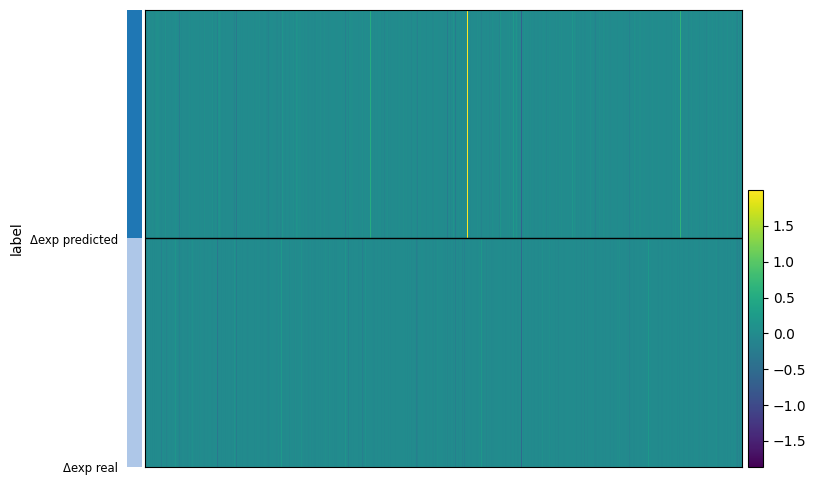

In [43]:
sc.pl.heatmap(adata_diff, var_names = adata.var_names, groupby = 'label', save='delta gene exp 8m month.pdf')

In [44]:
adata_diff.var_names

Index(['A2m', 'Aagab', 'Aak1', 'Abca2', 'Abca7', 'Abcc9', 'Abhd17a', 'Abhd17b',
       'Abhd17c', 'Abhd6',
       ...
       'Zfp239', 'Zfp36', 'Zfp536', 'Zfp60', 'Zfp605', 'Zhx1', 'Zic1', 'Zim1',
       'Zmym1', 'Zmym2'],
      dtype='object', length=2581)